# Module 3

In module 3 we look at correlation and regression. Here we provide some tools in Python that can help you with these tasks.

We will begin by importing some of the libraries and modules we've used before, and some new ones.

In [1]:
import numpy
from scipy import stats
import pandas

from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

Sklearn, or scikit-learn ([sklearn documentation](https://scikit-learn.org/stable/index.html)) is a library with tools for predictive analysis and machine learning, and matplotlib ([matplotlib documentation](https://matplotlib.org/)) is a plotting library to help us visualise our data and results.

Let's start with obtaining covariance. We can use numpy for this task, consider some x and y data

In [2]:
x = [1.92, 1.94, -0.3, 0.0, 0.17, 1.084, -0.4, 0.41, 2.5, 1.47]
y = [2.5, 1.82, -0.4, 0.57, 1.2, 1.22, 0.18, 0.22, 2.1, 2.2]

we can put these into a numpy array (a matrix)

In [3]:
M = numpy.stack((x, y), axis=0)
numpy.cov(M)

array([[1.08327916, 0.91884956],
       [0.91884956, 0.98081   ]])

what this covariance matrix shows us is 
$\begin{bmatrix}\text{Cov}(x,x) & \text{Cov}(x,y)\\\text{Cov}(y,x) & \text{Cov}(y,y)\end{bmatrix}$.

We can plot our data and see if this covariance makes sense. 
The way we plot our data is with the following steps:
1. Create a figure
2. Add a set of axes to the figure
3. Label the axes and format the graph
4. Plot the data

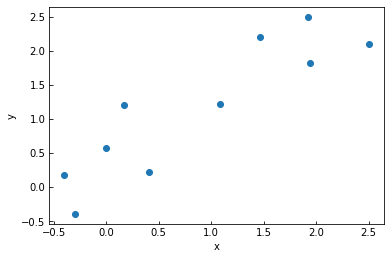

In [4]:
fig = pyplot.figure()
ax = fig.add_subplot()
ax.tick_params(axis='both', direction='in')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.scatter(x, y)

We see a positive covariance in the scatter plot which is a good sign.

The next thing to do is to calculate the correlation coefficient, we'll look primarily at the Pearson coefficient. We can do this with a function from the stats library called perasonr:

In [5]:
r, _ = stats.pearsonr(x, y)
print(r)

0.8914187685318501


This function returns the correlation coefficient and a $p$ value, but we will not worry about the $p$ value now. What you see printed above is the correlation coefficient for our data which shows a relatively high correlation.

However, we did not check any of our assumptions before doing this. 
We can see from the data that it is qualitative/continuous, the scatter plot suggests a linear relationship, and we see no extreme outliers. So we only really need to test for normality, like we did in module 2, using the Shapiro-Wilk test.

In [6]:
print("x: ", stats.shapiro(x))
print("y: ", stats.shapiro(y))

x:  ShapiroResult(statistic=0.9224238395690918, pvalue=0.3776152729988098)
y:  ShapiroResult(statistic=0.943261981010437, pvalue=0.5898473858833313)


The Shapiro-Wilk test says we cannot reject the null-Hypothesis so our data probably comes from normally distributed populations.

If we move on to regression now, we will use the sklearn LinearRegression class:

In [7]:
regression = LinearRegression()

The LinearRegression class expects the data given to it in a certain format. One valid format that requires the least explanation is passing both the independent and dependent variables as column vectors (the .reshape() function reorganises the data into as many rows as needed (the *-1* argument) and a single column (the *1* argument).

In [8]:
x = numpy.array(x)
x = x.reshape(-1, 1)
y = numpy.array(y)
y = y.reshape(-1,1)

and now we can use the regression tool to fit a regression line to our data using least squares regression:

In [9]:
regression.fit(x, y)
a = regression.intercept_[0]
b = regression.coef_[0][0]
print(f"y = {a} + {b}x")

y = 0.4150830357423825 + 0.8482112397744115x


something about the line we obtained.

We can now plot this line of best fit if desired.

In [10]:
y_estimated = a*x + b

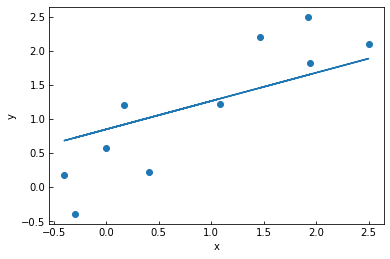

In [11]:
fig = pyplot.figure()
ax = fig.add_subplot()
ax.tick_params(axis='both', direction='in')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.scatter(x,y)
ax.plot(x, y_estimated)

How do we look at the residal analysis for the regresssion? 

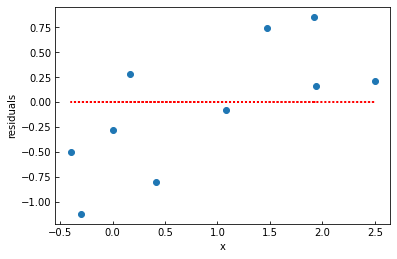

In [12]:
fig = pyplot.figure()
ax = fig.add_subplot()
ax.tick_params(axis='both', direction='in')
ax.set_xlabel('x')
ax.set_ylabel('residuals')

ax.scatter(x, y-y_estimated)

xaxis = numpy.zeros_like(x)  # make an array of 0s of the same shape as argument
ax.plot(x, xaxis, ls='dotted', c='red')  # can style our plots too